# Garments Project (by: The Guo Family)

Garmets are worn every day by humans around the world. From the famous and highly sought after fashion houses such as the Haus of Gucci, Louis Vitton, Dior, down to the smaller fashion labels, humans have the tendency to buy what is on the shelf. But, behind all the garments that are sold on a day to day basis, what goes behind the scenes? In this project, we want to look at the reasoning between the overtime that happens in this current fashion house together with making three (3) models to predict the number of overtime that will happen in the future.

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import os

In [9]:
df = pd.read_csv('garments.csv') # Importing garments.csv file to a pandas dataframe

After importing the dataset into the dataframe, we now look for errors and see what can we do for null cells.

In [10]:
# Dataset structure
print(df.info())  # Column names, data types, and non-null counts
print(df.describe())  # Statistics for numeric columns
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We see that there are null values in the WIP column, highlighted in the figure below:

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


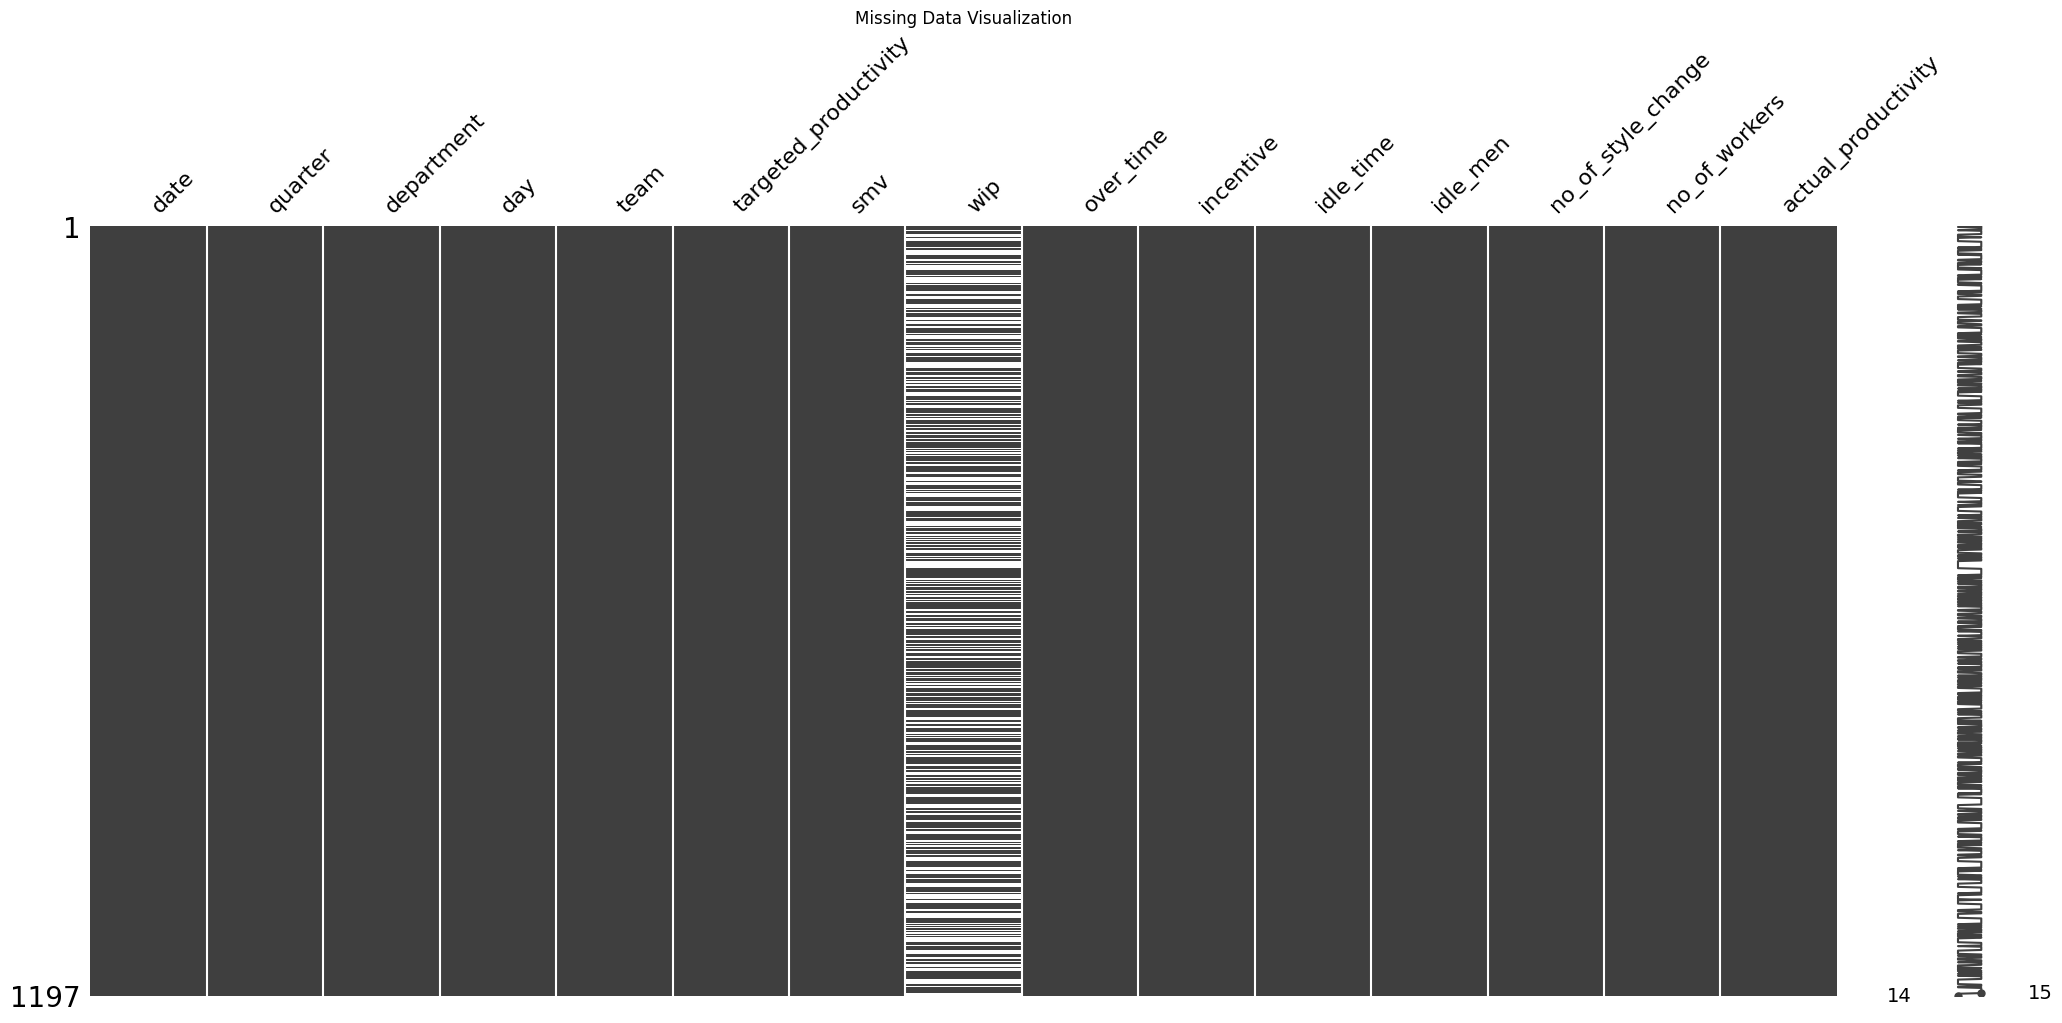

In [11]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

The team chose to replace empty cells with zero. This is doable since WIP stands for "work in progress" if the cell is null, it means that there are no projects that are "work in progress", making them null.

In [12]:
# Replace NaN values with 0
df = df.fillna(0)

# Replace empty strings with 0
df = df.replace('', 0)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


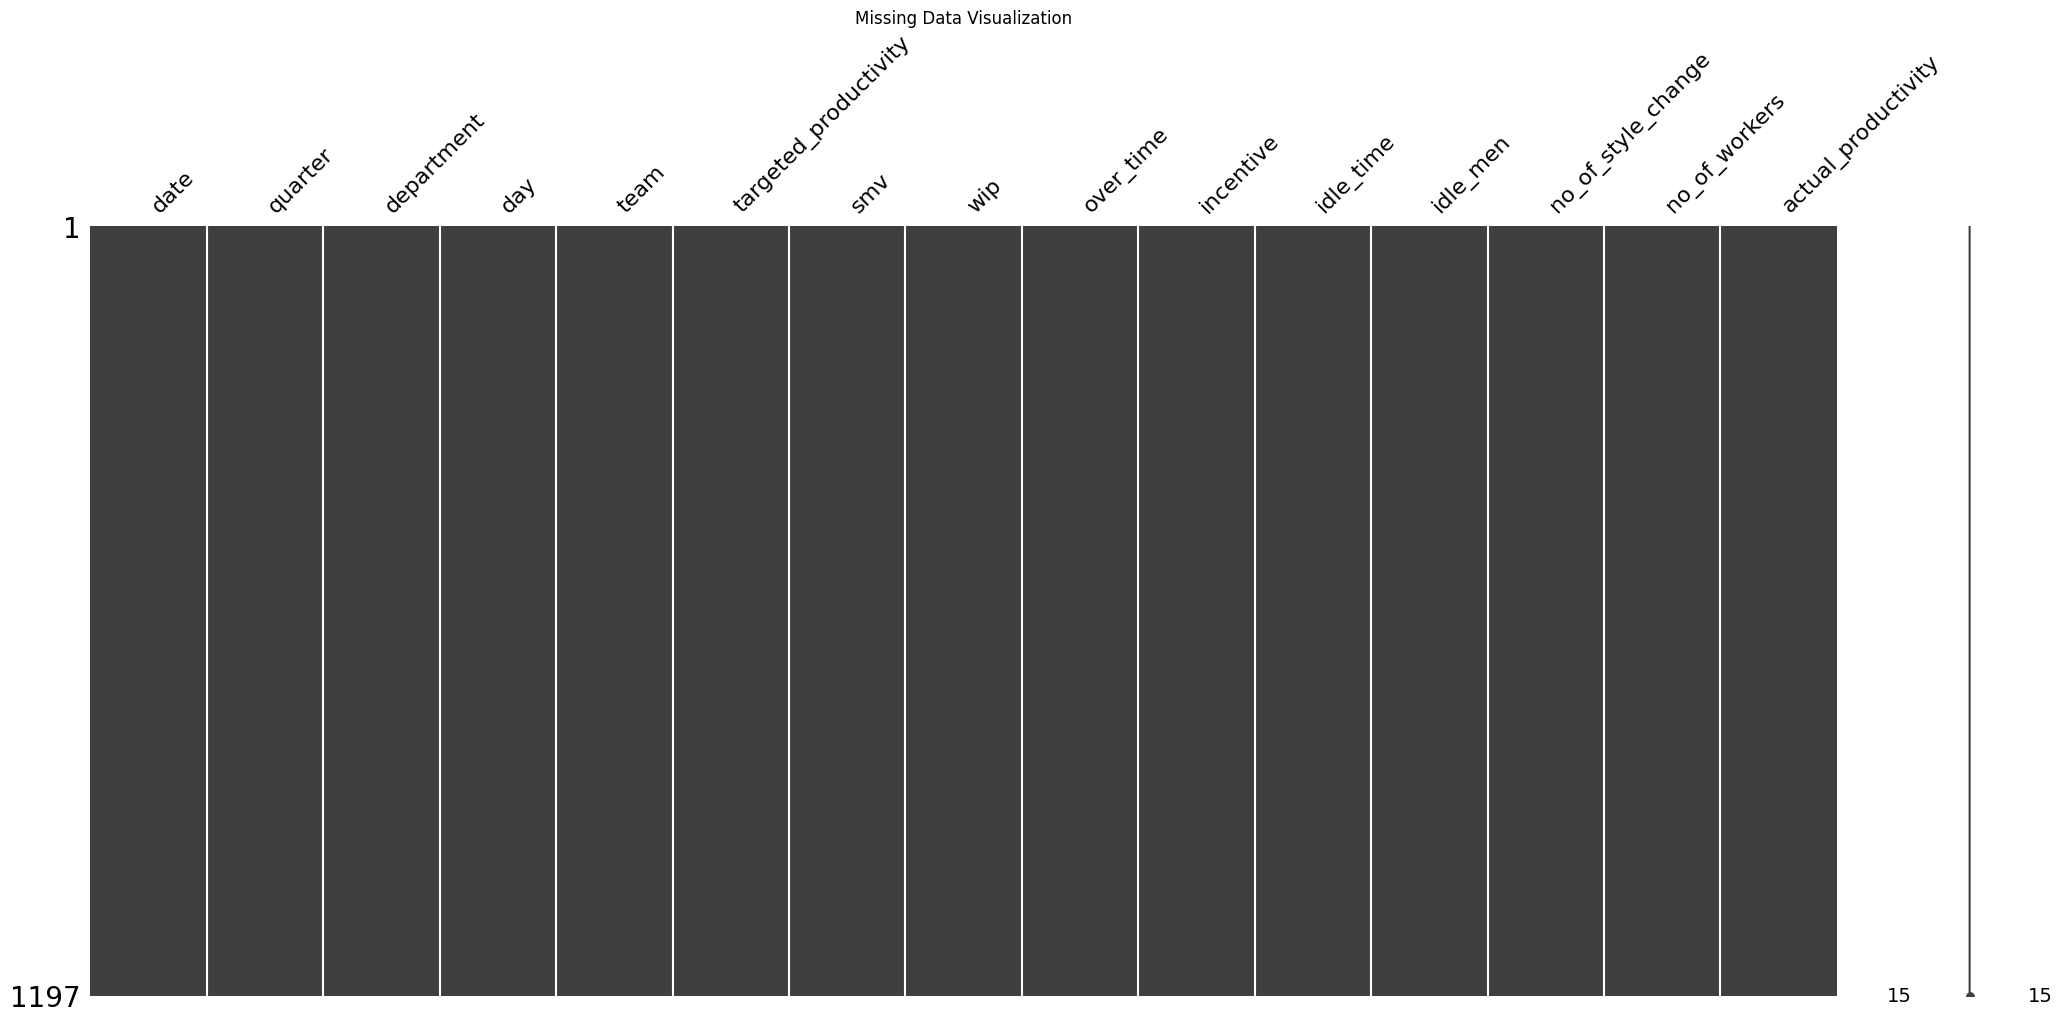

In [13]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

Here we're making sure that the dataset does not have any more null cells.

Afterwards, we normalize the values to make sure that all numerical features have the same impact on the model.

In [14]:
true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers']
numeric_columns = df[true_numeric_columns]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns and update the DataFrame
df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

After normalizing the values, we move on to adding some columns to help with parsing through data.

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month  # Extract the month

Finally, we move on to looking at the data itself and see what does it mean to this certain fashion haus.

# Exploring the data

Firstly, we look at the distribution of each numerical data and see what it means to the data itself.

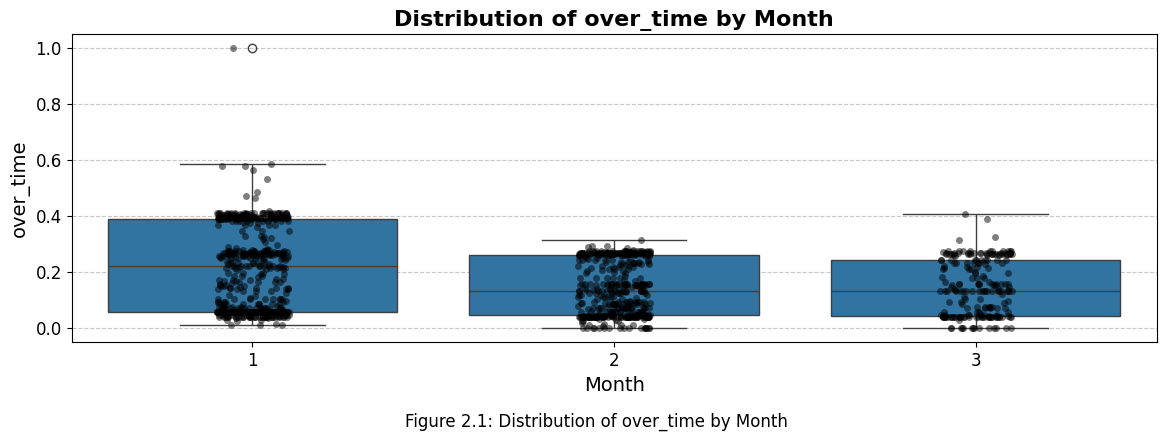

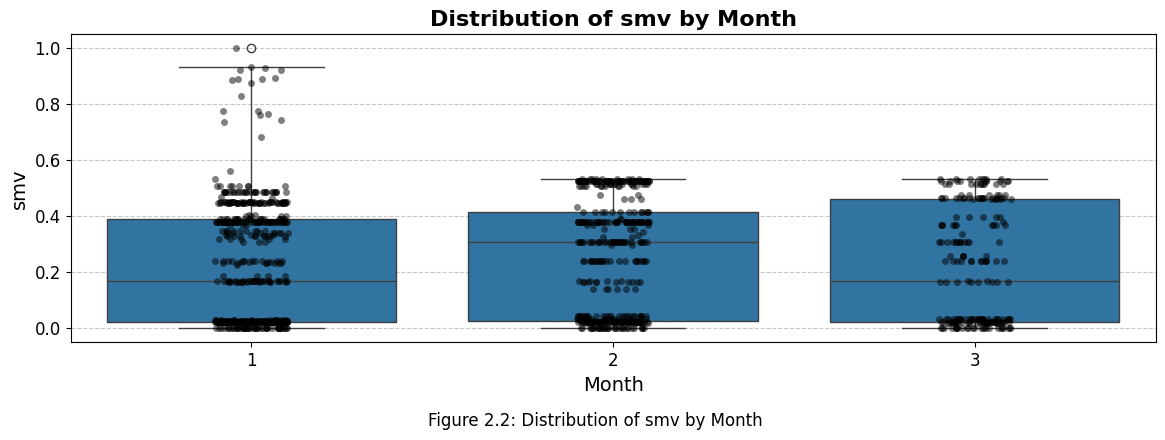

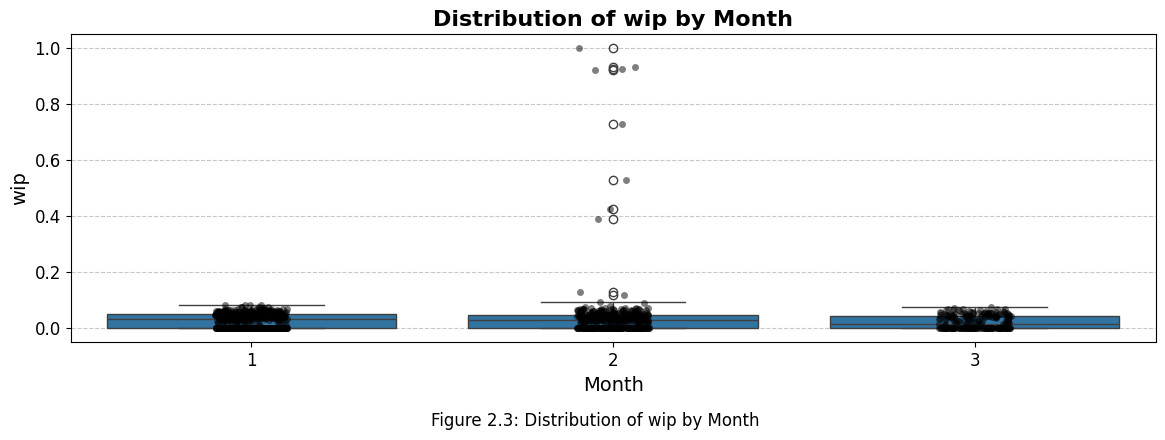

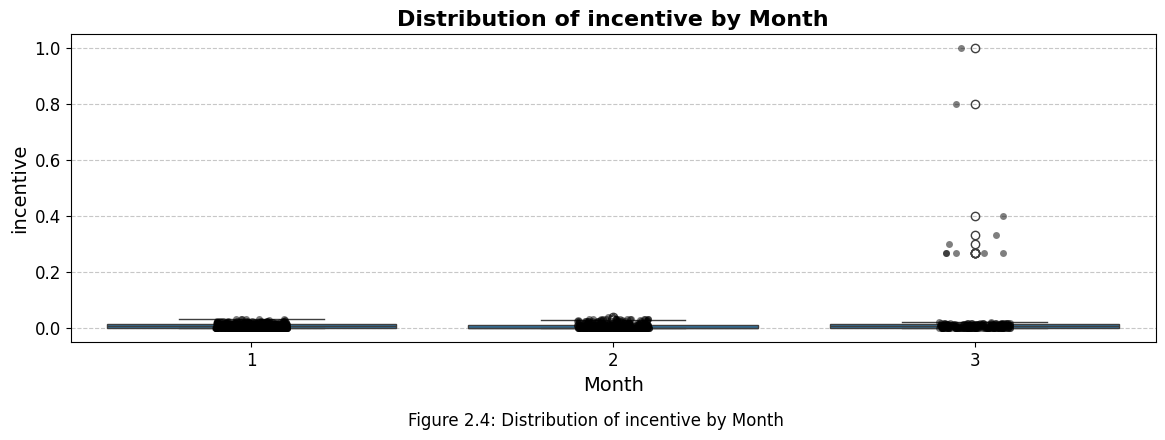

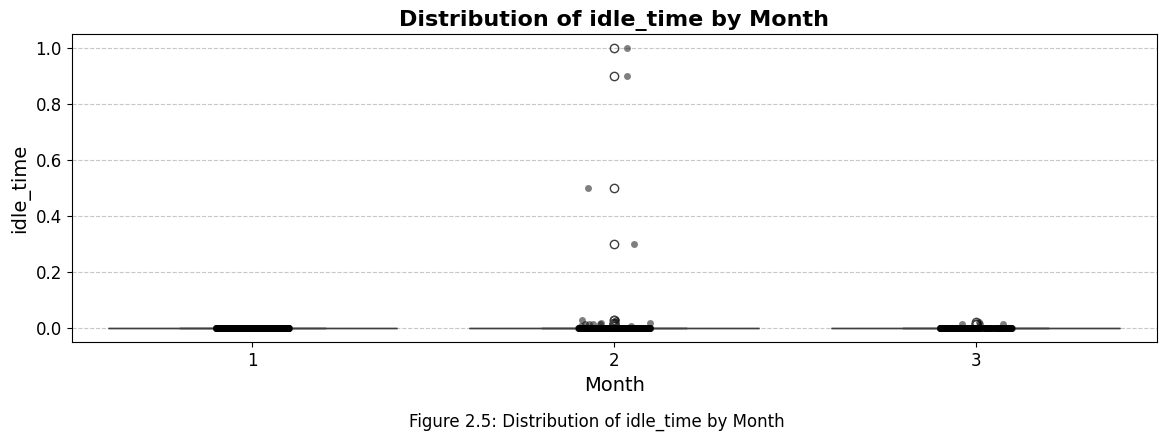

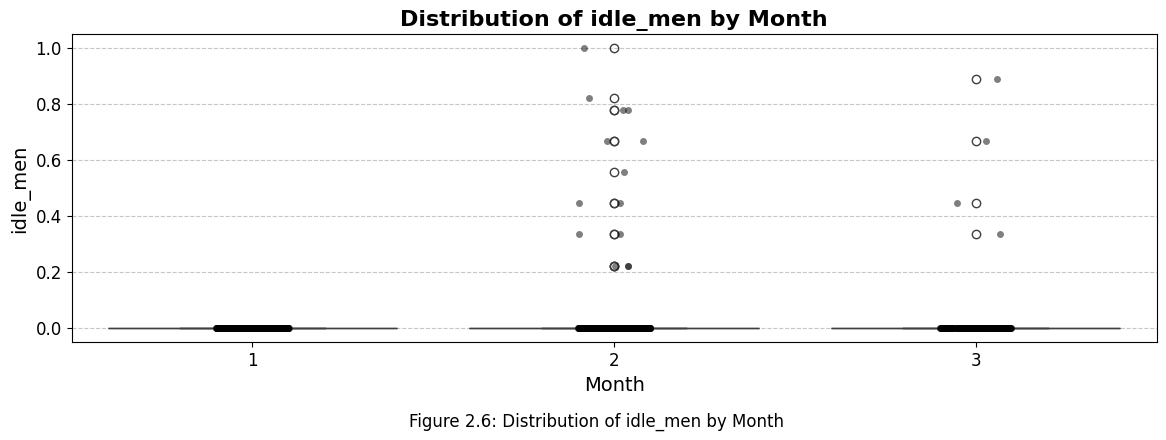

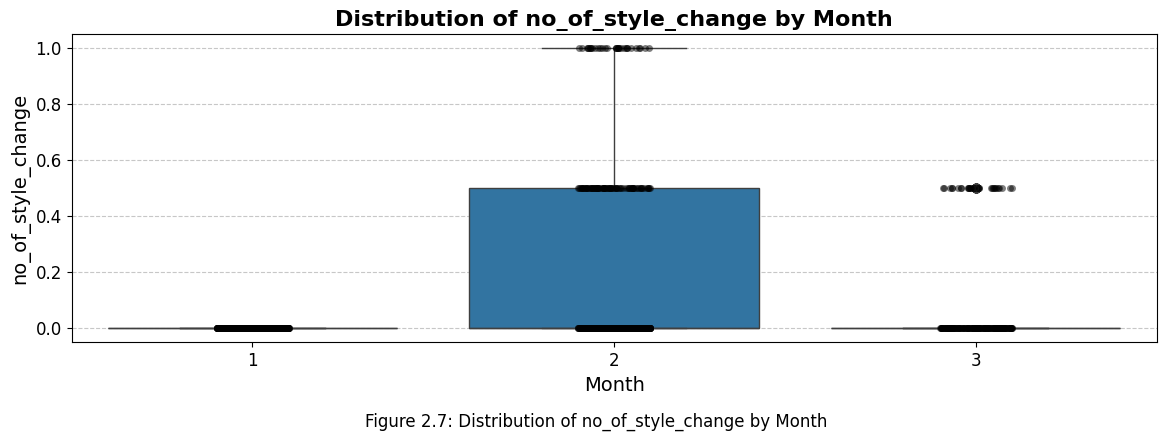

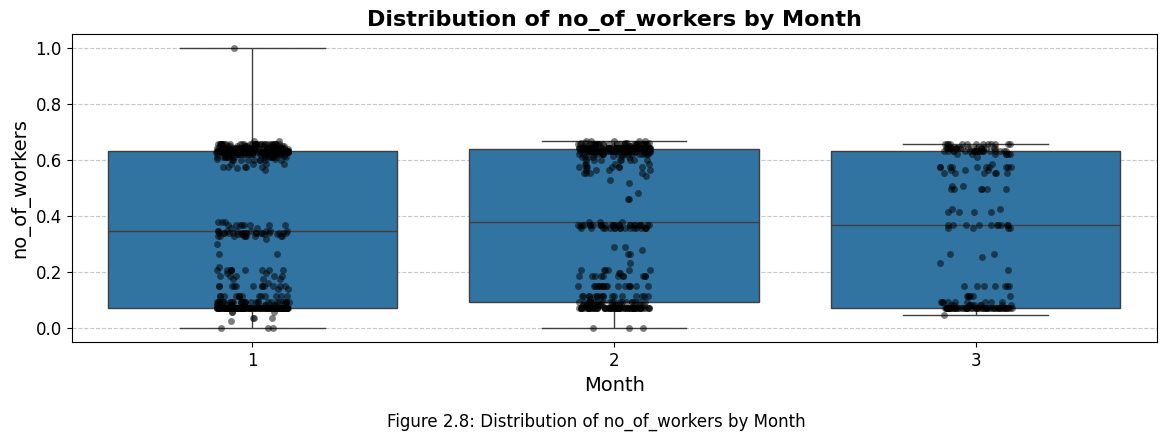

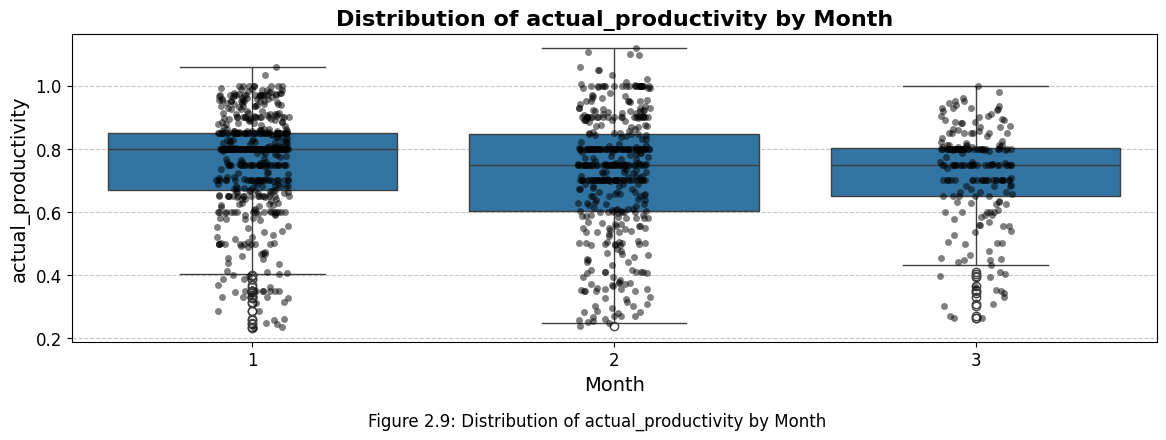

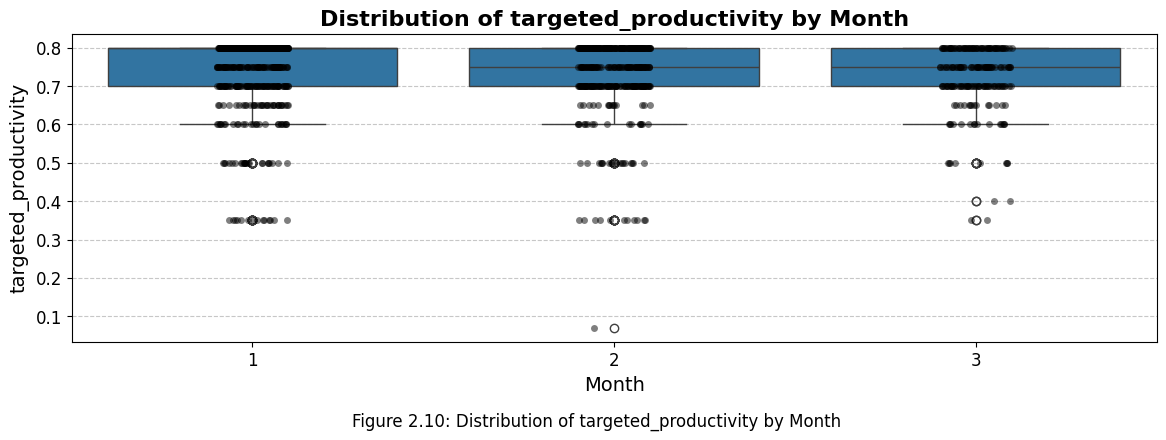

In [16]:
true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers', 'actual_productivity', 'targeted_productivity']

# Ensure output directory exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Starting figure number
figure_number = 2.1

# Starting figure number
major_figure_number = 2  # Represents the major part (e.g., 2.x)
minor_figure_number = 1  # Represents the minor part (e.g., x.1)

# Visualize distributions of numeric columns
for col in true_numeric_columns:
    figure_number = f"{major_figure_number}.{minor_figure_number}" # Combine major and minor figure numbers for the filename
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.boxplot(x='month', y=col, data=df, showfliers=True)  # Boxplot
    sns.stripplot(x='month', y=col, data=df, color='black', alpha=0.5, jitter=0.1, dodge=False)  # Reduced jitter
    plt.title(f'Distribution of {col} by Month', fontsize=16, fontweight='bold')  # Title
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
    plt.figtext(0.5, -0.1, f"Figure {figure_number}: Distribution of {col} by Month", ha='center', fontsize=12) # Add figure label as a caption
    
    
    figure_filename = os.path.join(output_dir, f"Figure_{figure_number}.png")
    plt.savefig(figure_filename, bbox_inches='tight')
    
    # Increment the minor figure number
    minor_figure_number += 1
    
    plt.show()


As shown in Figure 2.1, it shows the distribution of over time per month. The chart shows different patterns in overtime hours over three months. In Month 1, the median overtime is higher and more varied than in Months 2 and 3. This might mean there's a seasonal pattern, like a busy time with more work or production, possibly due to certain needs or deadlines. Also, some extreme values in Month 1, almost reaching the highest possible overtime of 1.0, could be due to unusual events, like sudden staff shortages or urgent project needs, causing some workers or days to have much higher overtime.

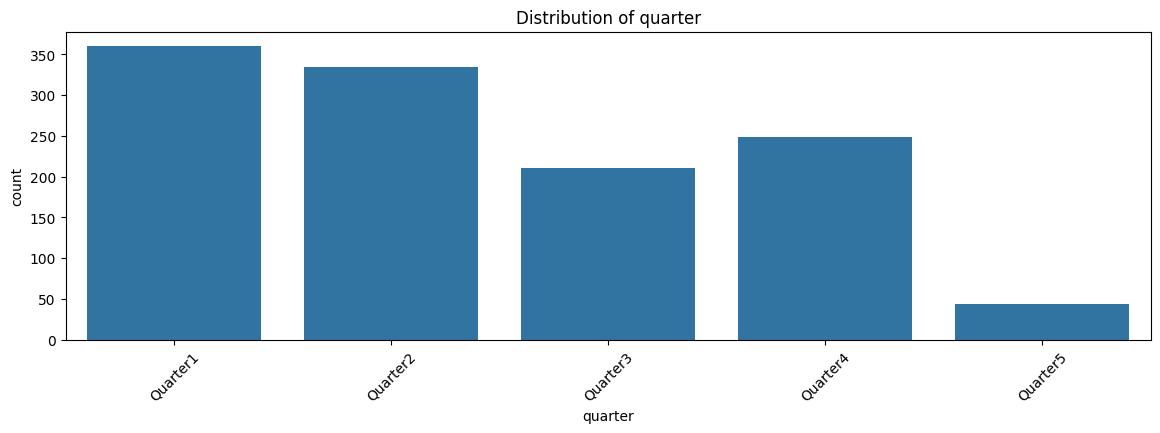

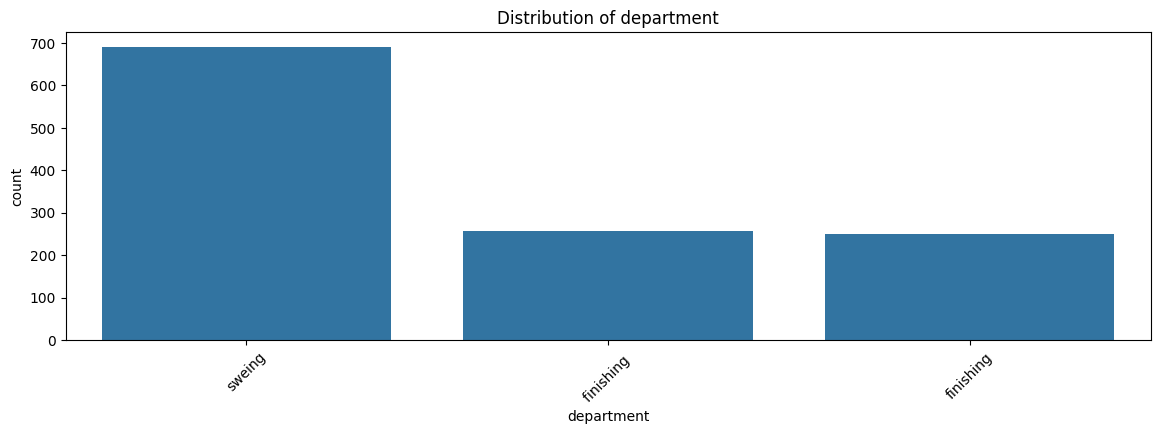

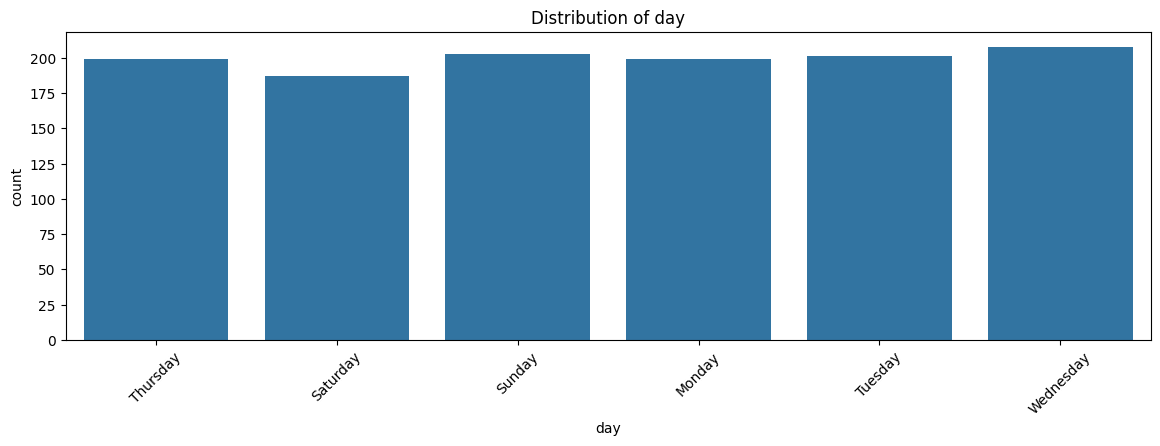

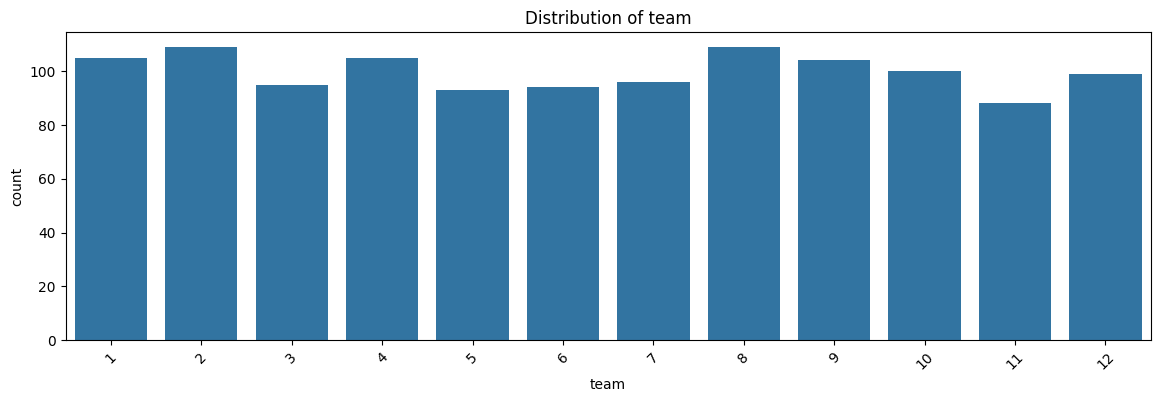

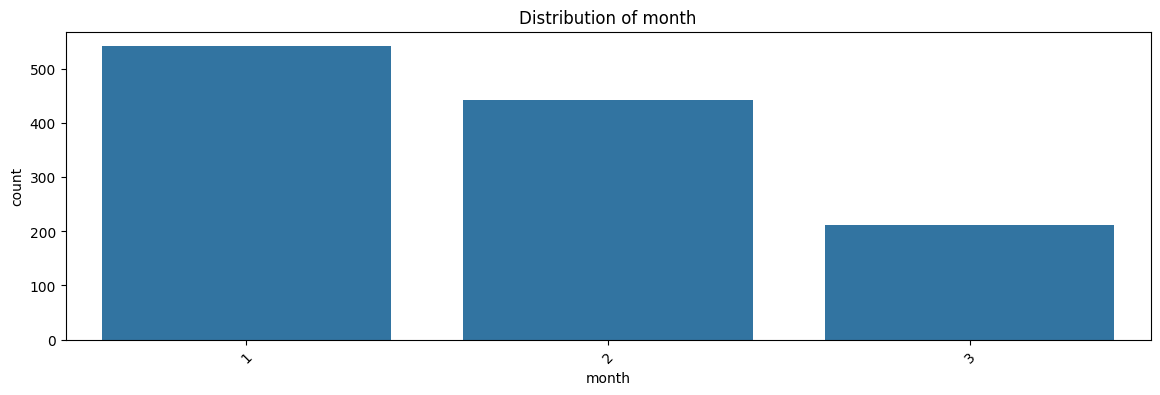

In [17]:
# Create a list of columns excluding the true numeric ones
remaining_columns = [col for col in df.columns if col not in true_numeric_columns and col != 'date']

# Filter the remaining categorical columns (assuming they're not numeric)
categorical_columns = df[remaining_columns]

# Check unique values and distributions for the remaining categorical features
for col in categorical_columns:
    plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 8 inches
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

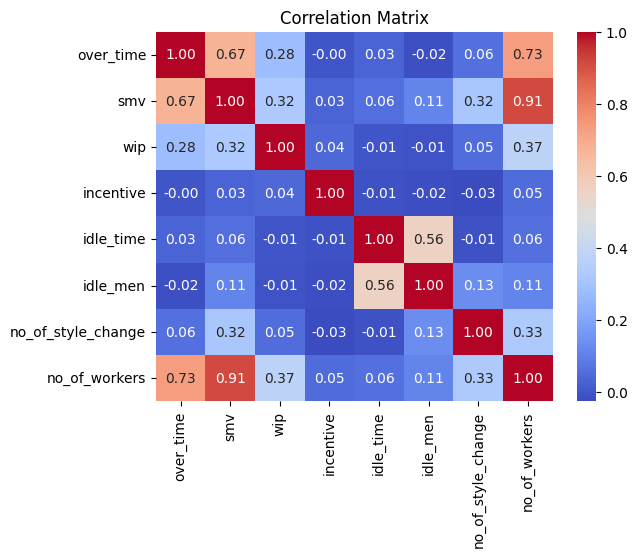

Correlation with Overtime:
 over_time             1.000000
no_of_workers         0.734164
smv                   0.674887
wip                   0.276529
no_of_style_change    0.059790
idle_time             0.031038
incentive            -0.004793
idle_men             -0.017913
Name: over_time, dtype: float64


In [18]:
# Correlation matrix
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlations with 'over_time'
correlation_with_overtime = numeric_columns.corr()['over_time'].sort_values(ascending=False)
print("Correlation with Overtime:\n", correlation_with_overtime)


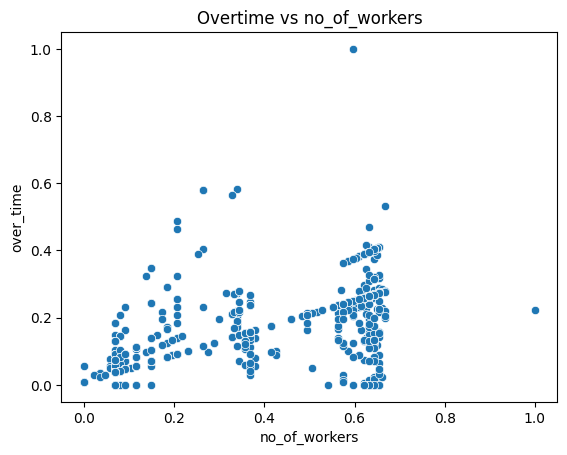

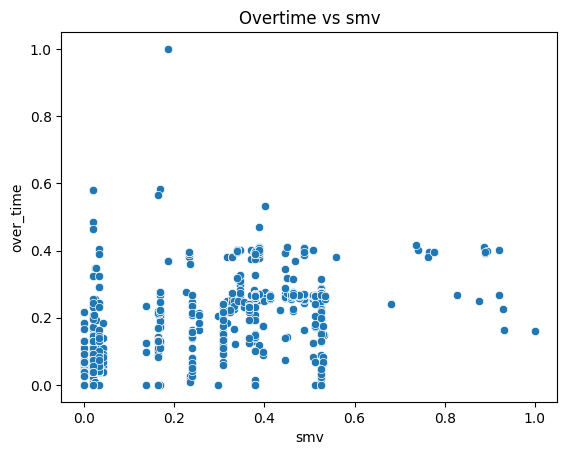

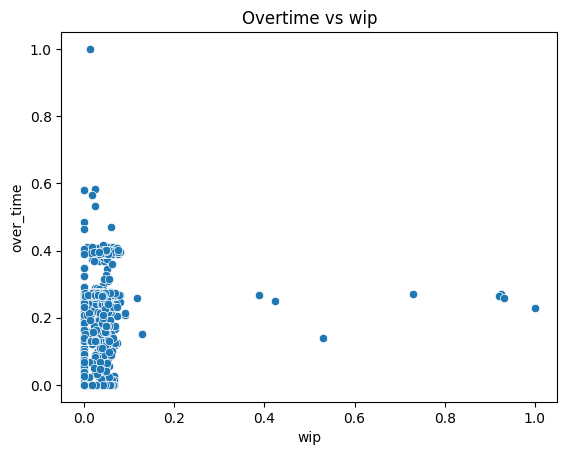

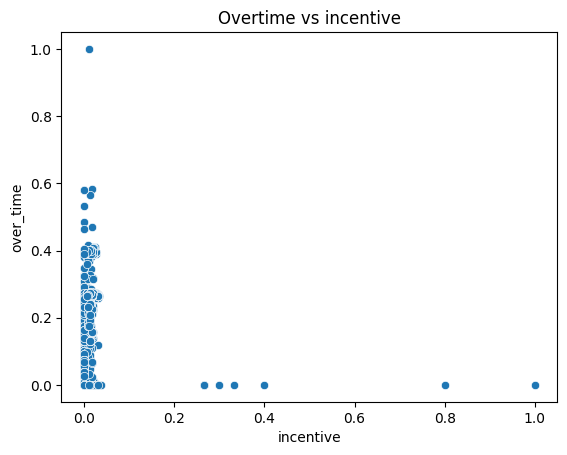

In [19]:
# Scatterplots for numeric columns
for col in ['no_of_workers', 'smv', 'wip', 'incentive']:
    sns.scatterplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime vs {col}')
    plt.show()


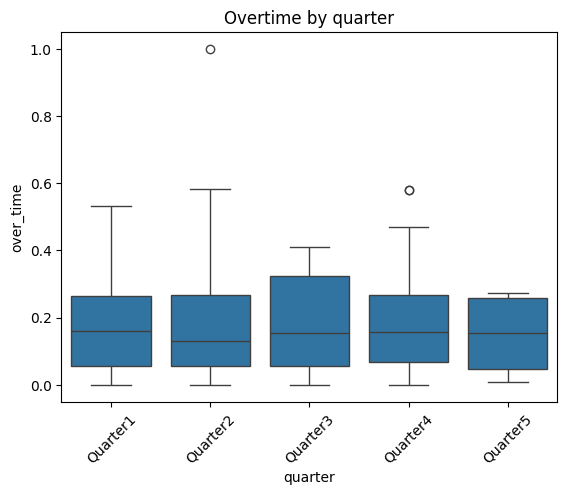

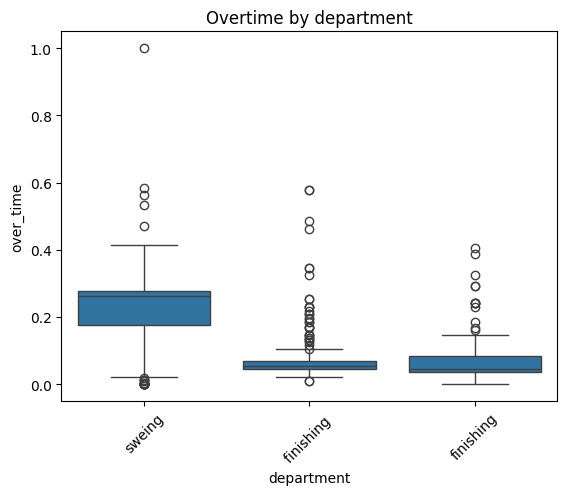

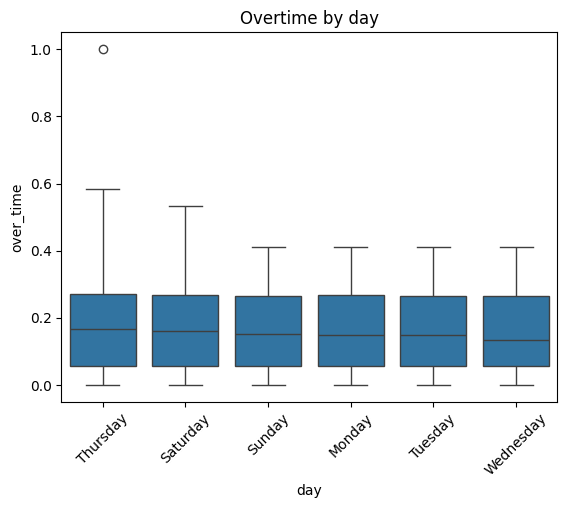

In [20]:
# Boxplots for categorical features
for col in ['quarter', 'department', 'day']:
    sns.boxplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime by {col}')
    plt.xticks(rotation=45)
    plt.show()


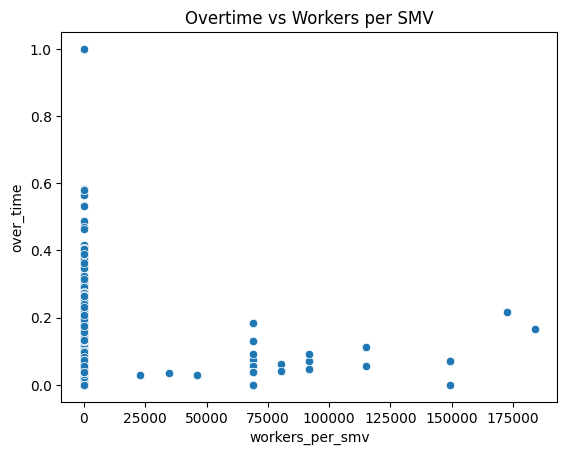

         over_time           targeted_productivity actual_productivity
              mean       std                  mean                mean
quarter                                                               
Quarter1  0.172875  0.111714              0.744083            0.751560
Quarter2  0.168018  0.140886              0.732090            0.743710
Quarter3  0.188889  0.140572              0.721190            0.704759
Quarter4  0.187162  0.129010              0.714516            0.709067
Quarter5  0.143729  0.105291              0.718182            0.826177


In [21]:
# Interaction terms (e.g., workers_per_smv)
df['workers_per_smv'] = df['no_of_workers'] / (df['smv'] + 1e-6)
sns.scatterplot(x='workers_per_smv', y='over_time', data=df)
plt.title('Overtime vs Workers per SMV')
plt.show()

# Group-Wise Analysis
grouped = df.groupby('quarter').agg({
    'over_time': ['mean', 'std'],
    'targeted_productivity': ['mean'],
    'actual_productivity': ['mean']
})
print(grouped)


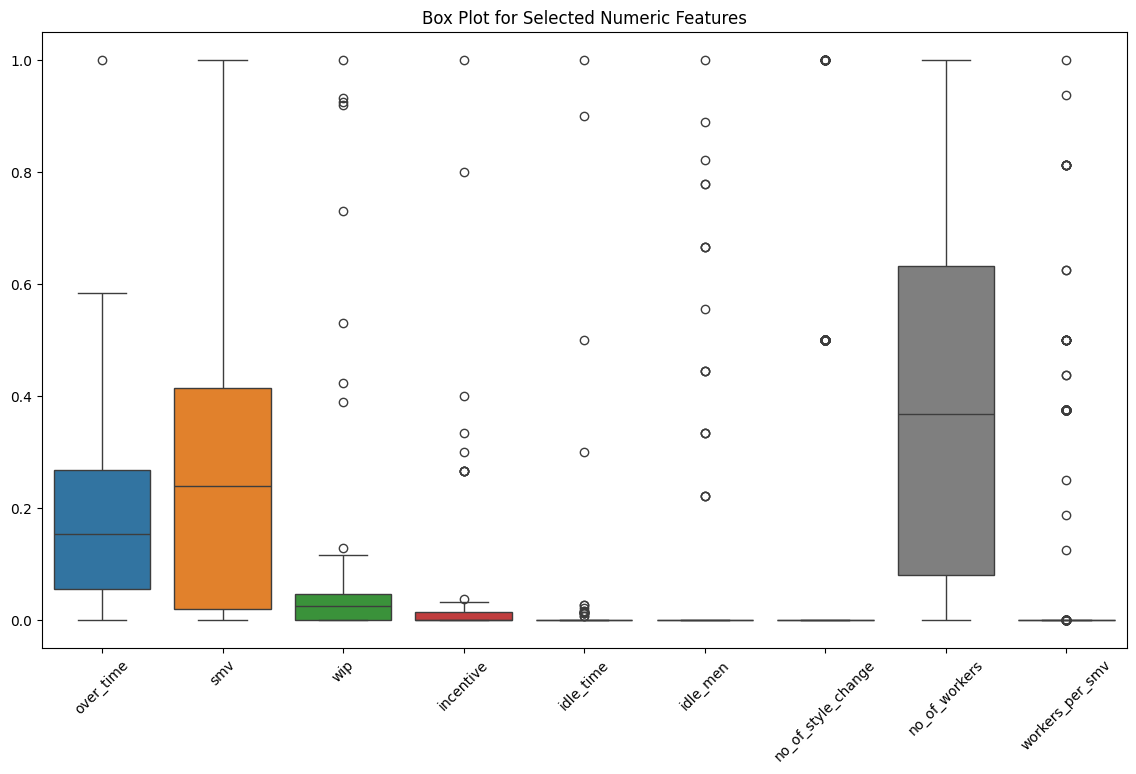

Outliers:
           date   quarter  department       day  team  targeted_productivity  \
138 2015-01-08  Quarter2      sweing  Thursday    12                   0.80   
139 2015-01-08  Quarter2      sweing  Thursday     6                   0.80   
146 2015-01-08  Quarter2      sweing  Thursday    11                   0.35   
383 2015-01-22  Quarter4  finishing   Thursday     1                   0.70   
384 2015-01-22  Quarter4  finishing   Thursday     2                   0.70   

          smv       wip  over_time  incentive  idle_time  idle_men  \
138  0.168602  0.023700   0.583333   0.017500        0.0       0.0   
139  0.164731  0.017775   0.564815   0.013889        0.0       0.0   
146  0.186218  0.012412   1.000000   0.010556        0.0       0.0   
383  0.020132  0.000000   0.578704   0.000000        0.0       0.0   
384  0.020132  0.000000   0.578704   0.000000        0.0       0.0   

     no_of_style_change  no_of_workers  actual_productivity  month  \
138                 0.0

In [22]:
# Normalize the 'workers_per_smv' column
df['workers_per_smv'] = scaler.fit_transform(df[['workers_per_smv']])

# Define the columns to include in the boxplot
selected_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                    'no_of_style_change', 'no_of_workers', 'workers_per_smv']

# Boxplot for selected numeric features
plt.figure(figsize=(14, 8))  # Width: 14 inches, Height: 8 inches
sns.boxplot(data=df[selected_columns])  # Use only the selected columns
plt.title('Box Plot for Selected Numeric Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Z-score method for outlier detection
df['z_score'] = zscore(df['over_time'])
outliers = df[df['z_score'].abs() > 3]
print("Outliers:\n", outliers)


C:\Users\gaby arco\AppData\Local\Temp\ipykernel_5384\2967914280.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['over_time'].resample('M').mean().plot()


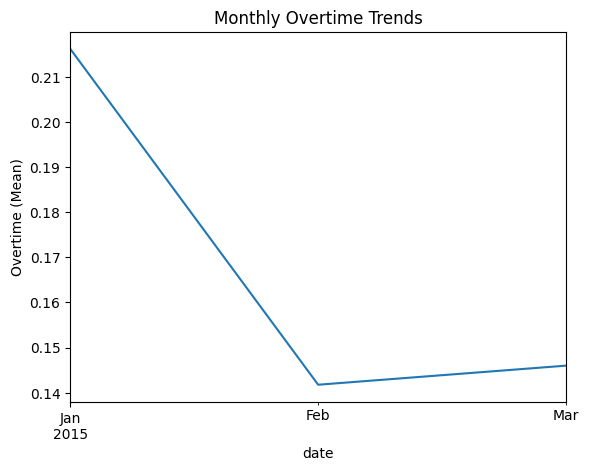

In [23]:
# Trends over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['over_time'].resample('M').mean().plot()
plt.title('Monthly Overtime Trends')
plt.ylabel('Overtime (Mean)')
plt.show()


# Linear Regression

In [166]:
import csv
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score


In [167]:
df.head(n=6)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,workers_per_smv,z_score
date,,,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,0.450252,0.047920,0.273148,0.027222,0.0,0.0,0.0,0.655172,0.940725,1,0.000008,0.750589
2015-01-01,Quarter1,finishing,Thursday,1,0.75,0.020132,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.886500,1,0.000019,-1.077682
2015-01-01,Quarter1,sweing,Thursday,11,0.80,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.800570,1,0.000011,-0.271092
2015-01-01,Quarter1,sweing,Thursday,12,0.80,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.800570,1,0.000011,-0.271092
2015-01-01,Quarter1,sweing,Thursday,6,0.80,0.445219,0.050601,0.074074,0.013889,0.0,0.0,0.0,0.620690,0.800382,1,0.000008,-0.790895
2015-01-01,Quarter1,sweing,Thursday,7,0.80,0.445219,0.042557,0.259259,0.010556,0.0,0.0,0.0,0.620690,0.800125,1,0.000008,0.643044


<Axes: ylabel='Frequency'>

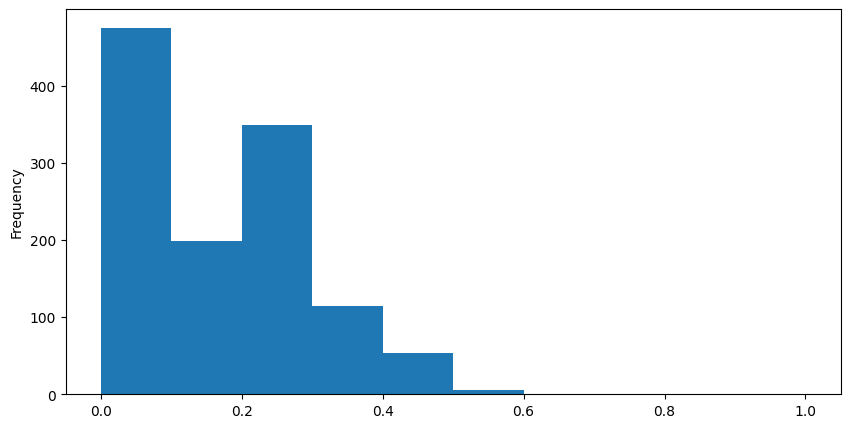

In [168]:
plt.figure(figsize = (10,5))
df['over_time'].plot(kind = "hist")

In [169]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month',
       'workers_per_smv', 'z_score'],
      dtype='object')

In [170]:
df_linear = df.drop(['quarter',	'department', 'team', 'day', 'month'], axis = 1)
x = df_linear.drop(['over_time'], axis = 1)
y = df_linear['over_time']
df_linear.head(n=6)
df_linear.columns

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'workers_per_smv', 'z_score'],
      dtype='object')

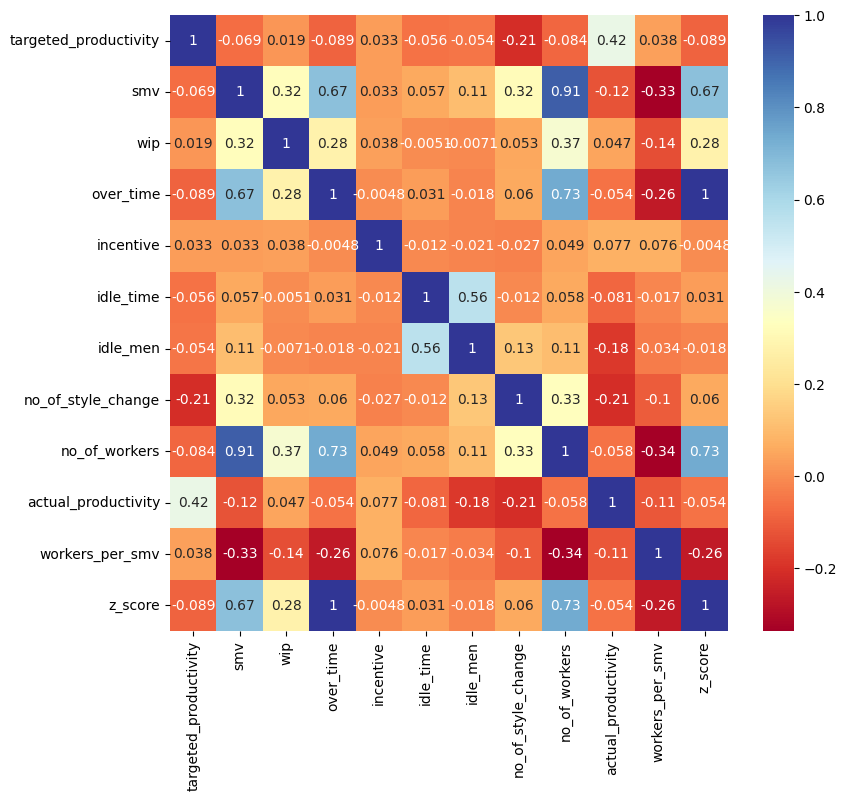

In [171]:
plt.figure(figsize = (9,8))
corr_linear = df_linear.corr()
sns.heatmap(corr_linear, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

In [172]:
target_corr = abs(corr_linear['over_time'])
pos_corr_target = target_corr[target_corr > 0.25]
pos_corr_target

smv                0.674887
wip                0.276529
over_time          1.000000
no_of_workers      0.734164
workers_per_smv    0.262072
z_score            1.000000
Name: over_time, dtype: float64

In [173]:
x = x.drop(['targeted_productivity', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'actual_productivity', 'workers_per_smv', 'z_score'], axis=1)
x

,smv,wip,no_of_workers
date,,,
2015-01-01,0.450252,0.047920,0.655172
2015-01-01,0.020132,0.000000,0.068966
2015-01-01,0.164731,0.041865,0.327586
2015-01-01,0.164731,0.041865,0.327586
2015-01-01,0.445219,0.050601,0.620690
...,...,...,...
2015-03-11,0.000000,0.000000,0.068966
2015-03-11,0.019357,0.000000,0.068966
2015-03-11,0.019357,0.000000,0.068966


In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(718, 3) (718,)
(479, 3) (479,)


In [175]:
from garments import AnalyticalMethod, PolyFitMethod

In [176]:
analytical_method = AnalyticalMethod()

W = analytical_method.compute_weights(x_train, y_train.to_numpy().reshape(-1, 1))


In [177]:
y_predict = analytical_method.predict(x_test)

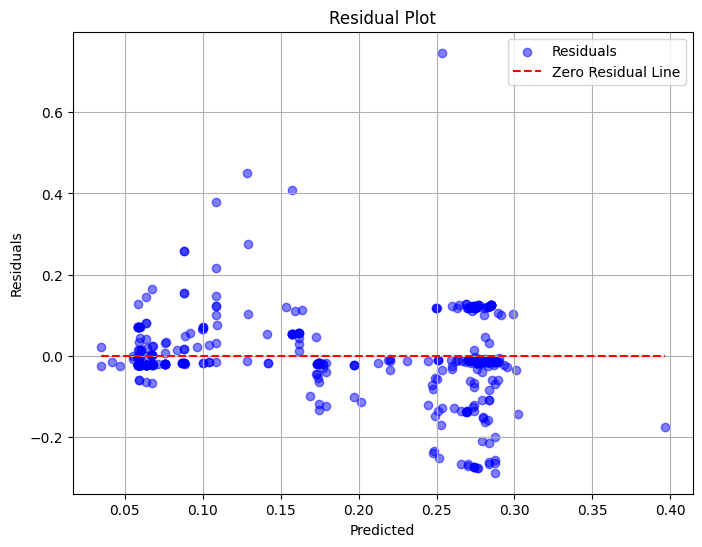

In [178]:
y_predict = y_predict.flatten()


residuals = y_test - y_predict
plt.figure(figsize=(8, 6))

plt.scatter(y_predict, residuals, color='blue', alpha=0.5, label='Residuals')

# Add horizontal line at 0 (zero residuals) with label
plt.hlines(y=0, xmin=y_predict.min(), xmax=y_predict.max(), colors='red', linestyles='dashed', label='Zero Residual Line')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.grid()
plt.show()

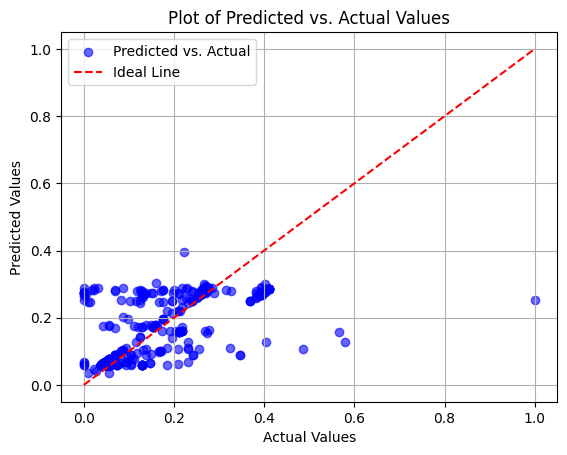

In [179]:
# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.6, label="Predicted vs. Actual", color="blue")

# Diagonal line (ideal case where y_test == y_predict)
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
ideal_line, = ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

# Add labels and title
ax.set_title("Plot of Predicted vs. Actual Values")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend()
ax.grid()

# Show the plot
plt.show()

In [180]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance on the test set
y_predict = analytical_method.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.009260053663533366
Root Mean Squared Error (RMSE): 0.09622917262209713
R² Score: 0.4597628135156694


In [196]:
polyfit_method = PolyFitMethod()

Feature: smv
R² Score: 0.4555
RMSE: 0.0953
First 5 Residuals: date
2015-01-01    0.008508
2015-01-01   -0.050556
2015-01-01   -0.005910
2015-01-01   -0.005910
2015-01-01   -0.188494
Name: over_time, dtype: float64
--------------------------------------------------
Feature: wip
R² Score: 0.0765
RMSE: 0.1241
First 5 Residuals: date
2015-01-01    0.087009
2015-01-01   -0.122966
2015-01-01   -0.041633
2015-01-01   -0.041633
2015-01-01   -0.113528
Name: over_time, dtype: float64
--------------------------------------------------
Feature: no_of_workers
R² Score: 0.5390
RMSE: 0.0877
First 5 Residuals: date
2015-01-01   -0.007287
2015-01-01   -0.025470
2015-01-01   -0.017448
2015-01-01   -0.017448
2015-01-01   -0.193542
Name: over_time, dtype: float64
--------------------------------------------------


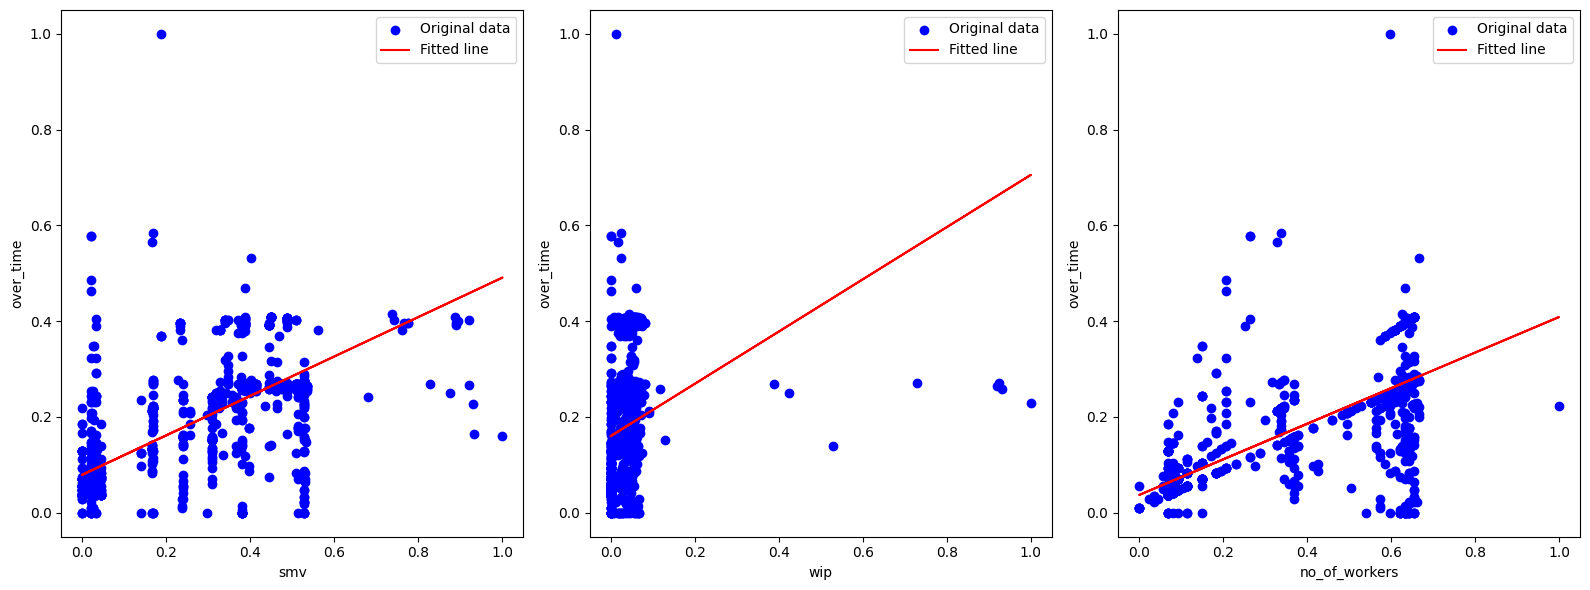

In [ ]:
plt.figure(figsize=(16, 6))  
for i, feature in enumerate(x.columns):
    x_feature = x[feature].values  # Get the feature as an array
    
    # Compute the weights (linear fit) for the feature
    W = polyfit_method.compute_weights(x_feature, y)  # Linear fit (degree=1)
    
    # Predict the target values for the feature
    y_pred = polyfit_method.predict(x_feature)

    residuals = y - y_pred
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    # Plotting the data and the fitted line for each feature
    plt.subplot(1, len(x.columns), i + 1)
    plt.scatter(x_feature, y, color='blue', label='Original data')
    plt.plot(x_feature, y_pred, color='red', label='Fitted line')
    plt.xlabel(feature)
    plt.ylabel('over_time')
    plt.legend()

    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {feature}')
    plt.grid(True)
    plt.show()

    print(f"Feature: {feature}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")


plt.tight_layout()
plt.show()

In [206]:
y_pred_analytical = analytical_method.predict(x_test)

In [211]:
y_pred_analytical = y_pred_analytical.flatten()


residuals = y_test - y_pred_analytical
plt.figure(figsize=(8, 6))

plt.scatter(y_pred_analytical, residuals, color='blue', alpha=0.5, label='Residuals')

# Add horizontal line at 0 (zero residuals) with label
plt.hlines(y=0, xmin=y_pred_analytical.min(), xmax=y_pred_analytical.max(), colors='red', linestyles='dashed', label='Zero Residual Line')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.grid()
plt.show()

ValueError: operands could not be broadcast together with shapes (479,) (718,) 

ValueError: x and y must be the same size

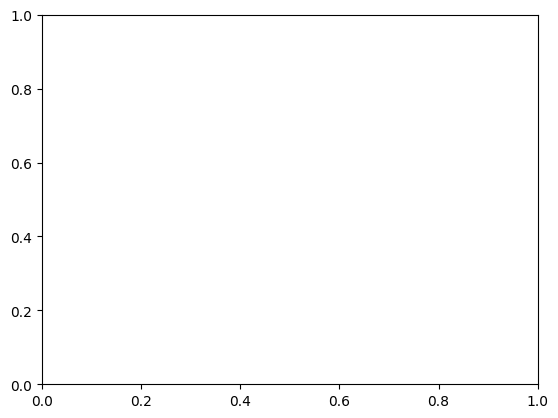

In [207]:
# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.6, label="Predicted vs. Actual", color="blue")

# Diagonal line (ideal case where y_test == y_predict)
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
ideal_line, = ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

# Add labels and title
ax.set_title("Plot of Predicted vs. Actual Values")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend()
ax.grid()

# Show the plot
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

In [182]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'eta0': [0.001, 0.01, 0.1],             # Learning rate options
    'max_iter': [1000, 5000, 10000],         # Number of iterations
    'penalty': ['l2', 'l1', None],           # Regularization types: L2 (Ridge), L1 (Lasso), and no regularization
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule options
    'alpha': [0.0001, 0.001, 0.01]           # Regularization strength for L2 and L1
}

grid_search = GridSearchCV(SGDRegressor(random_state=1), param_grid, cv=5, 
                           scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

best_params = grid_search.best_params_


best_model = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'l1'}
Best Score (Negative MSE): -0.006742779680487714


In [183]:
model = SGDRegressor(alpha=best_params['alpha'], eta0=best_params['eta0'], 
                     max_iter=best_params['max_iter'], penalty=best_params['penalty'], 
                     learning_rate=best_params['learning_rate'], 
                     random_state=1, verbose=1)

In [184]:
model.partial_fit(x_train, y_train)

-- Epoch 1
Norm: 0.30, NNZs: 3, Bias: 0.050035, T: 718, Avg. loss: 0.004006
Total training time: 0.00 seconds.


SGDRegressor(eta0=0.1, learning_rate='adaptive', penalty='l1', random_state=1,
             verbose=1)

In [185]:
y_predict = model.predict(x_test)

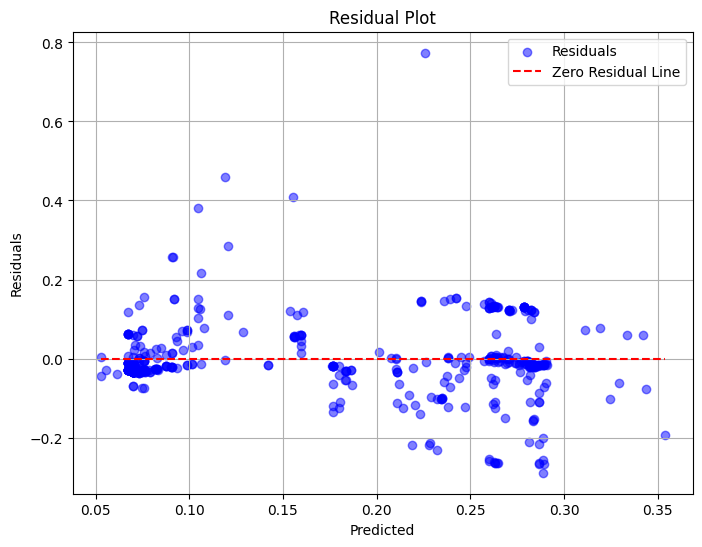

In [186]:
residuals = y_test - y_predict
plt.figure(figsize=(8, 6))

plt.scatter(y_predict, residuals, color='blue', alpha=0.5, label='Residuals')

# Add horizontal line at 0 (zero residuals) with label
plt.hlines(y=0, xmin=y_predict.min(), xmax=y_predict.max(), colors='red', linestyles='dashed', label='Zero Residual Line')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.grid()
plt.show()

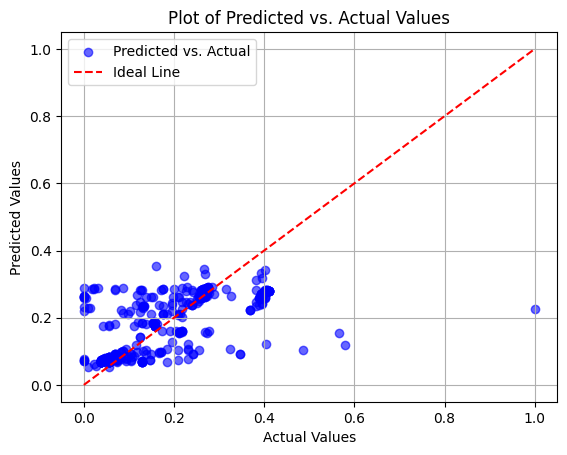

In [187]:
# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.6, label="Predicted vs. Actual", color="blue")

# Diagonal line (ideal case where y_test == y_predict)
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
ideal_line, = ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

# Add labels and title
ax.set_title("Plot of Predicted vs. Actual Values")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend()
ax.grid()

# Show the plot
plt.show()

In [188]:
model.fit(x_train, y_train)

-- Epoch 1
Norm: 0.30, NNZs: 3, Bias: 0.050035, T: 718, Avg. loss: 0.004006
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 3, Bias: 0.016396, T: 1436, Avg. loss: 0.003680
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 3, Bias: 0.015675, T: 2154, Avg. loss: 0.003630
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.40, NNZs: 3, Bias: 0.061612, T: 2872, Avg. loss: 0.003554
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.35, NNZs: 3, Bias: 0.027398, T: 3590, Avg. loss: 0.003558
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.38, NNZs: 3, Bias: 0.053464, T: 4308, Avg. loss: 0.003614
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.39, NNZs: 3, Bias: 0.030281, T: 5026, Avg. loss: 0.003401
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.39, NNZs: 3, Bias: 0.037360, T: 5744, Avg. loss: 0.003415
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.39, NNZs: 3, Bias: 0.028774, T: 6462, Avg. loss: 0.003401
Total training time: 0.00 se

SGDRegressor(eta0=0.1, learning_rate='adaptive', penalty='l1', random_state=1,
             verbose=1)

In [189]:
y_predict = model.predict(x_train)

In [190]:
y_predict[0:10]

array([0.27283999, 0.06817813, 0.17465228, 0.28077065, 0.27450131,
       0.08389956, 0.27329062, 0.12391129, 0.27283999, 0.15894502])

In [191]:
print('Score: ', model.score(x_test, y_test))

Score:  0.4595683956837786


In [192]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance on the test set
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.009263386124906809
Root Mean Squared Error (RMSE): 0.09624648629901669
R² Score: 0.4595683956837786
